# Maximizing Concentration of an Intermediate in a Batch Reactor using solve_ivp

A desired product B is as an intermediate in a series reactions

$$A^{\underrightarrow{k_A}}B^{\underrightarrow{k_B}}C $$

where A is a raw material and C is an undesired by-product. The reaction operates isothermally with rate constants **k$_A$ = 0.5 min$^{-1}$** and **k$_B$ = 0.1 min$^{-1}$**. The raw material is a solution with concentration **C$_{A,f}$ = 20 moles/liter.**

A 100 liter tank is available for use as a batch reactor. How long should the reaction be operated to maximize the concentration of B?

Mathematical model:

A material balance for an isothermal stirred batch reactor with a volume **V = 40 liters** and an initial concentration **C$_{A,f}$** is given by

\begin{equation*} \frac{d C_A}{d t} = -k_AC_A \tag{1}\end{equation*}

\begin{equation*} \frac{d C_B}{d t} = k_AC_A - k_BC_B \tag{2}\end{equation*}

With an initial concentration **C$_{A,f}$**.

***optimization***

variables: time

objective: max C$_B$(t)

functional constraint: none

bounds: 0 $\leq$ t $\leq$ 50

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.integrate import solve_ivp

Concentration CB has maximum 1.3373861411813575 moles/liter at time 4.022215823711061 minutes.


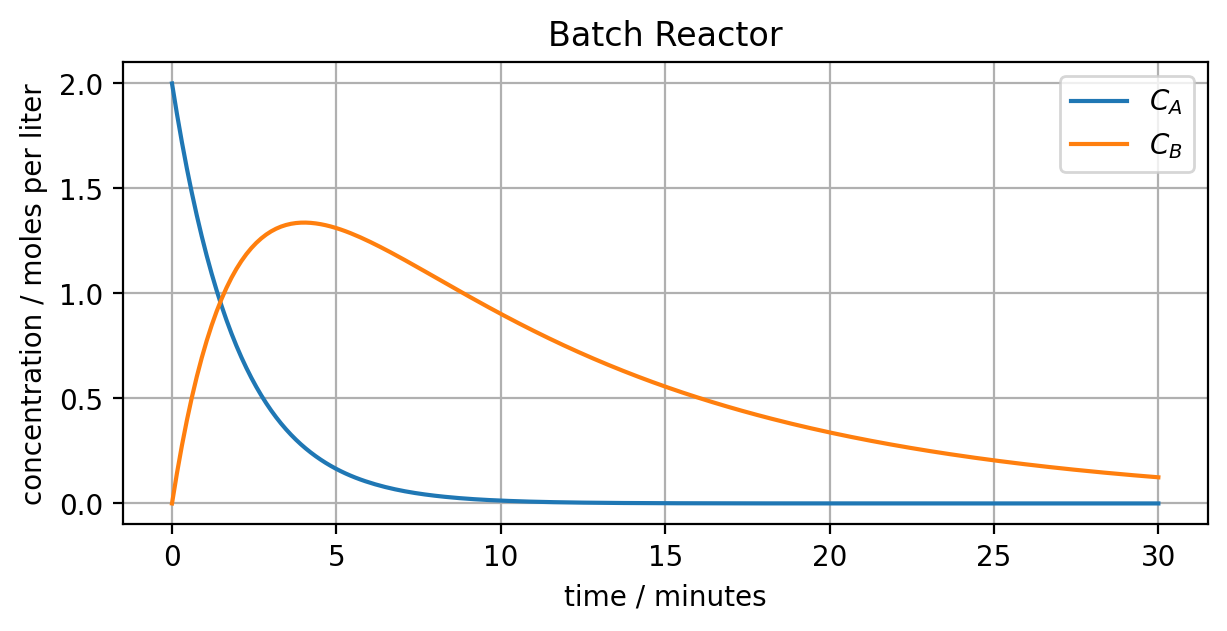

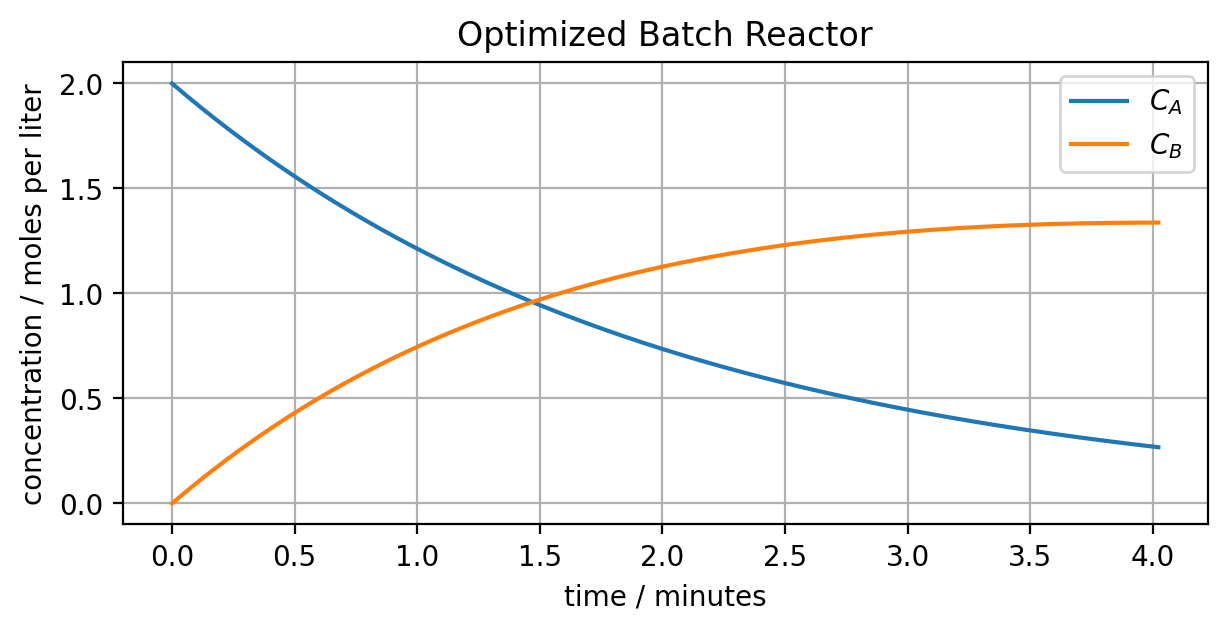

In [2]:
V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # 1/min
CAf = 2.0  # moles/liter

def batch(t, y, *params):
    
    kA, kB = params
    
    CA, CB = y
    dCA_dt = -kA*CA
    dCB_dt = kA*CA - kB*CB
    
    return np.array([dCA_dt, dCB_dt])

t = np.linspace(0, 30, 200)

soln = solve_ivp(batch, (0, t[-1]), [CAf, 0], t_eval = t, args = (kA, kB))

fig, ax = plt.subplots(figsize = (7, 3), dpi=200)
ax.plot(t, soln.y[0])
ax.plot(t, soln.y[1])
ax.set_xlabel('time / minutes')
ax.set_ylabel('concentration / moles per liter')
ax.set_title('Batch Reactor')
ax.legend(['$C_A$','$C_B$'])
ax.grid(True)

def obj_conv(t):
    
    soln = solve_ivp(batch, (0, t), [CAf, 0], args = (kA, kB))
    
    y = soln.y[:, -1] # take the last element of each differential equation - we have 2 here
    
    CA = y[0]
    CB = y[1]
    
    return -CB # we need to minimize the negative value of CB

res = minimize_scalar(obj_conv, bounds=(0, 50), method='bounded')

print('Concentration CB has maximum', -obj_conv(res.x), 'moles/liter at time', res.x, 'minutes.')


def batch_opt(t, t_eval = None):
    
    soln = solve_ivp(batch, (0, t), [CAf, 0], t_eval = t_eval, args = (kA, kB))
    
    return soln


sol_batch_opt = batch_opt(res.x, t_eval = np.linspace(0, res.x, 200))

fig, ax = plt.subplots(figsize = (7, 3), dpi=200)


ax.plot(sol_batch_opt.t, sol_batch_opt.y[0])
ax.plot(sol_batch_opt.t, sol_batch_opt.y[1])
ax.set_xlabel('time / minutes')
ax.set_ylabel('concentration / moles per liter')
ax.set_title('Optimized Batch Reactor')
ax.legend(['$C_A$', '$C_B$'])
ax.grid(True)